<a href="https://colab.research.google.com/github/Joseluismed/Una-construcci-n-f-sico-matem-tica-desde-teor-a-de-solitones-hasta-estrellas-de-bosones/blob/main/Una_construcci%C3%B3n_f%C3%ADsico_matem%C3%A1tica_desde_teor%C3%ADa_de_solitones_hasta_estrellas_de_bosones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import conf as conf
import matplotlib.pyplot as plt

CARGANDO CONFIGURACION GENERAL PARA PLOTS


In [2]:
conf.general()

In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive-full


# Solitones en teoría del sombrero mexicano

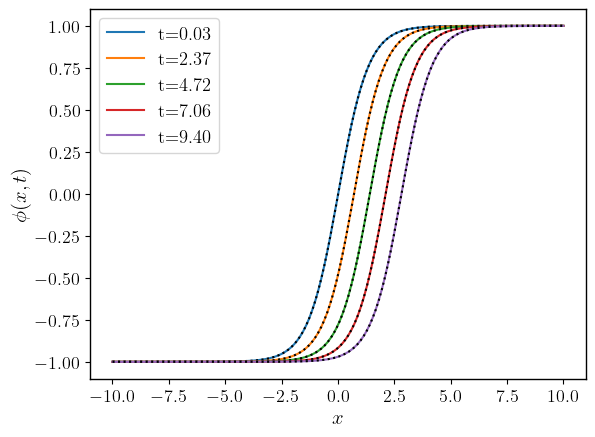

In [28]:
#Potencial sombrero mexicano MH
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
nu=(m**2)/l
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = nu*np.tanh((m*(x)/(np.sqrt(2*(1-v0**2)))))

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :] -dt*((m*nu*v0)/(np.sqrt(2*(1-v0**2))))*(1/(np.cosh((m*(x))/(np.sqrt(2*(1-v0**2))))**2))  #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt
#Cambiamos el signo entre + y - en el segundo término dependiendo de la dirección de movimiento del campo
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*l*u[n,i]*(u[n,i]**2-nu**2)
    u[n+1,0]=-nu    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=nu    #Fijando condición en la frontera u(t,xf)
#En potencial del sombrero mexicano tenemos dos estados de vacío en phi=-nu y phi=nu entonces fijamos las condiciones en la frontera en alguno de estos estados

#definición de solución exacta
t=np.linspace(0,T,Nt)
X,T1=np.meshgrid(x,t)
def phiE(X, T1):
    return (m**2/l)*np.tanh((m/np.sqrt(2))*((X-v0*T1)/(np.sqrt(1-v0**2))))
# Gráfica de los resultados
for n in range(1, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :],label=f't={t[n]:.2f}')
    plt.plot(x, phiE(x, t[n]), color="black",linestyle='dotted')


plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x, t)$')
plt.legend(fontsize='small')
plt.show()

In [29]:
# Crear la malla espacio-temporal para la solución exacta
X, T1 = np.meshgrid(x, t)

# Calcular la solución exacta en todo el dominio
phi_exact_full = phiE(X, T1)

# Calcular el error absoluto en todo el dominio
error_abs = np.abs(u - phi_exact_full)

# Calcular el error absoluto promedio
error_abs_promedio = np.mean(error_abs)

# Calcular la desviación estándar del error absoluto
error_abs_std = np.std(error_abs)

# Rango de error (promedio ± desviación estándar)
rango_min = error_abs_promedio - error_abs_std
rango_max = error_abs_promedio + error_abs_std

# Imprimir resultados
print(f"Error absoluto promedio: {error_abs_promedio:.6f}")
print(f"Desviación estándar del error absoluto: {error_abs_std:.6f}")
print(f"Rango de error: [{rango_min:.6f}, {rango_max:.6f}]")



Error absoluto promedio: 0.000235
Desviación estándar del error absoluto: 0.000439
Rango de error: [-0.000204, 0.000674]


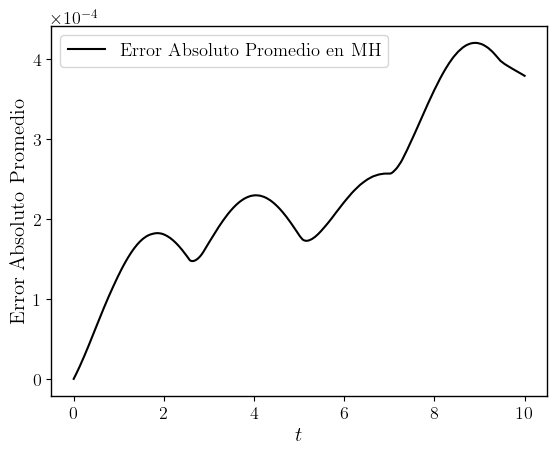

In [30]:
# Calcular el error absoluto promedio en cada instante de tiempo
error_abs_tiempo = np.mean(error_abs, axis=1)

# Graficar el error absoluto promedio en el tiempo
plt.plot(t, error_abs_tiempo, label="Error Absoluto Promedio  en MH",color='black')
plt.xlabel(r"$t$")
plt.ylabel(r"Error Absoluto Promedio")
plt.legend(fontsize='small')
plt.show()


# Solitones en teoría de sine-Gordon

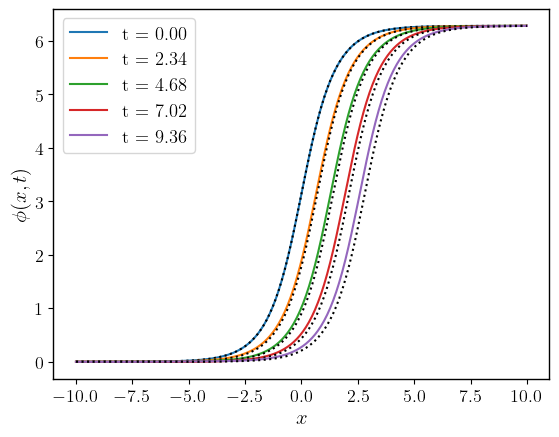

In [20]:
#Teoría sine-Gordon
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = ((4*m)/np.sqrt(l))*np.arctan(np.exp((m*(x))/(np.sqrt(1-v0**2))))

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :]-dt*((4*m**2*v0)/(np.sqrt(l*(1+v0**2))))*(np.exp((m*(x)/(np.sqrt(1-v0**2))))/(1+np.exp((2*m*(x))/(np.sqrt(1-v0**2)))))  #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt
#Cambiamos el signo entre + y - en el segundo término dependiendo de la dirección de movimiento del campo
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*(m**3/np.sqrt(l))*np.sin((np.sqrt(l)/m)*u[n,i])
    u[n+1,0]=0    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=2*np.pi    #Fijando condición en la frontera u(t,xf)
#En teoría de sine-Gordon tenemos infinitos estados de vacío en phi=2k pi entonces fijamos las condiciones en la frontera en alguno de estos estados
#solucion analítica
t=np.linspace(0,T,Nt)
X,T1=np.meshgrid(x,t)
def phiE(X, T1):
    return ((4*m)/np.sqrt(l))*np.arctan(np.exp((m*(X)-v0*T1)/(np.sqrt(1-v0**2))))
# Gráfica de los resultados
for n in range(0, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :], label=f"t = {n*dt:.2f}")
    plt.plot(x, phiE(x, t[n]), color="black", linestyle='dotted')

plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x, t)$')

plt.legend(fontsize='small')
plt.show()

In [27]:
# Crear la malla espacio-temporal para la solución exacta
X, T1 = np.meshgrid(x, t)

# Calcular la solución exacta en todo el dominio
phi_exact_full = phiE(X, T1)

# Calcular el error absoluto en todo el dominio
error_abs = np.abs(u - phi_exact_full)

# Calcular el error absoluto promedio
error_abs_promedio = np.mean(error_abs)

# Calcular la desviación estándar del error absoluto
error_abs_std = np.std(error_abs)

# Rango de error (promedio ± desviación estándar)
rango_min = error_abs_promedio - error_abs_std
rango_max = error_abs_promedio + error_abs_std

# Imprimir resultados
print(f"Error absoluto promedio: {error_abs_promedio:.6f}")
print(f"Desviación estándar del error absoluto: {error_abs_std:.6f}")
print(f"Rango de error: [{rango_min:.6f}, {rango_max:.6f}]")


Error absoluto promedio: 0.038109
Desviación estándar del error absoluto: 0.081311
Rango de error: [-0.043202, 0.119419]


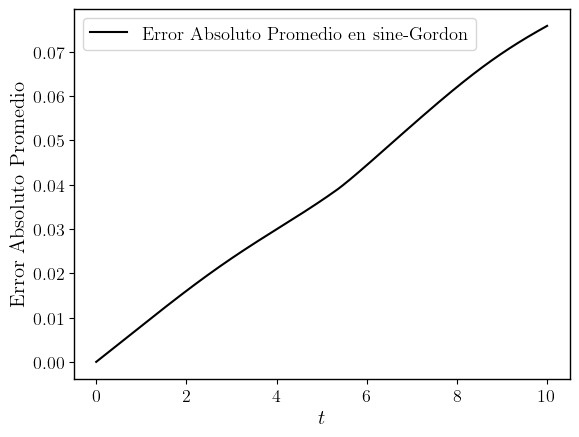

In [26]:
# Calcular el error absoluto promedio en cada instante de tiempo
error_abs_tiempo = np.mean(error_abs, axis=1)

# Graficar el error absoluto promedio en el tiempo
plt.plot(t, error_abs_tiempo, label="Error Absoluto Promedio  en sine-Gordon",color='black')
plt.xlabel(r"$t$")
plt.ylabel(r"Error Absoluto Promedio")
plt.legend(fontsize='small')
plt.show()


# Vórtices globales

<ipython-input-36-2f0d6c00bf07>:20: RuntimeWarning: overflow encountered in scalar multiply
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
<ipython-input-36-2f0d6c00bf07>:20: RuntimeWarning: overflow encountered in scalar power
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
<ipython-input-36-2f0d6c00bf07>:20: RuntimeWarning: invalid value encountered in scalar add
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r


Derivada inicial ajustada: 0.5831843281890681


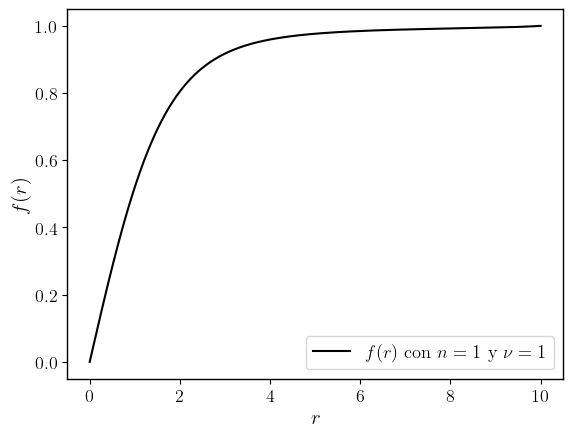

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#SOLUCIÓN CON n=1
# Parámetros de ecuacion diferencial
nu = 1
l=1
# Definir la ecuación diferencial a resolver sistema(variable independiente, vector estado[])
def sistema(r, y):
    """
    phi: posición
    y: vector de estado [phi, v]
    """
    f, v = y  # funcion y su derivada
    if r == 0:
        dfdr = v
        dvdr = 0
    else:
        dfdr = v  # Derivada de phi con respecto a r
        dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
    return np.array([dfdr, dvdr])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol

# Condiciones en la frontera
f_a = 0  # Valor en la frontera en r = a
f_b = nu  # Valor en la frontera en r = b

# Intervalo y número de puntos
a = 0  # Inicio del intervalo
b = 10  # Fin del intervalo
npt = 500  # Número de puntos

# Método de shooting utilizando bisección para encontrar la mejor derivada inicial
def shootingn1(vmin, vmax, nu, a, b, tol=1e-14):
    while True:
        v = (vmin + vmax) / 2
        y0 = [f_a, v]
        r, sol = RK4Met(sistema, y0, a, b, npt)

        # Comprobar el valor de la solución en la frontera
        if abs(sol[-1, 0] - f_b) < tol:  # Condición de tolerancia
            return v

        # Ajustar los límites de bisección
        if sol[-1, 0] < f_b:
            vmin = v
        else:
            vmax = v

        # Si la diferencia entre vmax y vmin es menor que la tolerancia
        if abs(vmax - vmin) < tol:
            return v

# Aplicación del método de shooting
vmin = 0
vmax = 10
dfdr = 0

# Solución final con el valor ajustado de la derivada inicial
v = shootingn1(vmin, vmax, nu, a, b)
y0 = [f_a, v]
print('Derivada inicial ajustada:', v)

r, sol = RK4Met(sistema, y0, a, b, npt)
f = sol[:, 0]
v = sol[:, 1]

# Graficar los resultados

plt.plot(r, f, c='black', label=r'$f(r)$ con $n=1$ y $\nu=1$')

plt.xlabel(r'$r$')

plt.ylabel(r'$f(r)$')


plt.legend(fontsize='small')

plt.show()


<ipython-input-38-fdae1e8f1dba>:1: RuntimeWarning: invalid value encountered in divide
  rho=v**2+f**2/r**2+(l/2)*(f**2-nu**2)**2


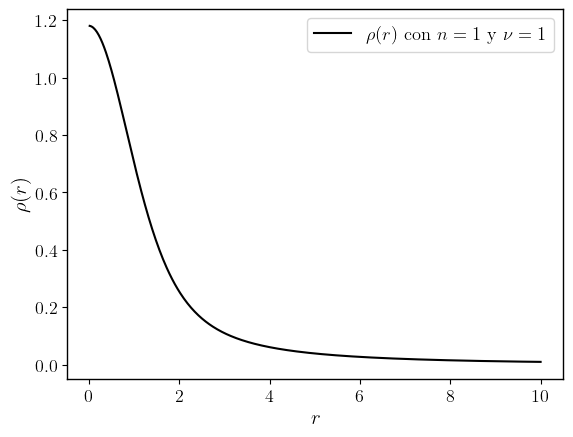

In [38]:
rho=v**2+f**2/r**2+(l/2)*(f**2-nu**2)**2
plt.plot(r,rho,label=r'$\rho(r)$ con $n=1$ y $\nu=1$',color='black')
plt.xlabel(r'$r$')
plt.ylabel(r'$\rho(r)$')
plt.legend(fontsize='small')
plt.show()

In [39]:
E=np.trapz(r*rho,r)
if np.isnan(E):
  print('La energía con la configuración n=1 es E=inf')
else:
  print('La energía con la configuración n=1 es E=',E)

La energía con la configuración n=1 es E=inf


# Estrellas de bósones

In [40]:
## Implementación sistema

def systema(r, V):
    """
    Sistema de ecuaciones de primer orden
    f = campo, u = potencial
    Variables: f, df, u, du = V
    """

    f, df, u, du =  V

    if r==0:
        ddf = -u*f/3
        ddu = -f**2/3
    else:
        ddf = -f*u - 2*df/r
        ddu = -f**2 - 2*du/r

    return [df, ddf, du, ddu]

In [41]:
## Implementación shooting
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

In [44]:
def solSys(sys, f0, u0=1, rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10, eventos=None):
    """
    """

    V0 = [f0, 0, u0, 0]

    rspan = np.linspace(rmin, rmax, 5000)
    if bool(eventos):
        sol = solve_ivp(sys, [rmin, rmax], V0, events=eventos, method=met,  rtol=Rtol, atol=Atol, t_eval=rspan)
    else:
        sol = solve_ivp(sys, [rmin, rmax], V0, method=met,  rtol=Rtol, atol=Atol, t_eval=rspan)

    return sol


In [42]:
## Implementación shooting 2
def Freq_solve(systema, smin, smax, u0=1, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False):
    """
    Implementación de un algoritmo de shooting usando un método de bisección para encontrar el valor de la
    frecuencia w0, dado una amplitud central p0.

    In:
    system -> sistema de ecuaciones
    smin, smax -> rango de valores en el que se buscará la amplitud central (recomendado añadir un check al código que verifique que smin<smax)
    rmax, rmin -> intervalo que se discretizará, por defecto rmin=0, rmax=1e03 (notar que lo q se busca es que alcance el límite en w0)
    met -> metodología usada por solve_ivp, las opciones son: 'DOP853', 'LSODA', 'RK45', por defecto está este último
    Rtol, Atol=1e-10 -> representan la tolerancia relativa y absoluta al usar solve_ivp, por defecto son Rtol=1e-09, Atol=1e-10
    limw -> representa la diferencia limítrofe que aceptaremos: abs((wmax-wmin)/2)<=limw Por defecto es limw=1e-14
    info -> Imprime información complementaria, por defecto info=False

    Out:
    s0, rTemp  -> valor de la frecuencia encontrada y el radio máximo de la iteración
    """


    # IMPORTANT: it is not possible to find two event at same time
    # Events
    def Sig(r, yV): return yV[0]
    def dSig(r, yV): return yV[1]

    # establece las direcciones
    Sig.direction = -1
    dSig.direction = 1
    # If direction is positive, event will only trigger when going from negative to positive,
    # and vice versa if direction is negative. If 0, then either direction will trigger event. Implicitly 0 if not assigned.

    # establece que acción tomar
    Sig.terminal = True
    dSig.terminal = True

    while True:
        s0 = (smin+smax)/2  # bisección metodología

        sol = solSys(systema, s0, u0=u0, rmin=rmin, rmax=rmax, met=met, eventos=(Sig, dSig), # notar orden de los eventos
                     Rtol=Rtol, Atol=Atol)

        if info:
            plt.plot(sol.t, sol.y[0])

        if sol.t[-1]==rmax:  # caso en que alcanzó el rmax
            print('Found', s0)
            rTemp = sol.t[-1]
            break
        elif sol.t_events[0].size > 0:  # caso en que hay algún evento tipo Sig, es decir s negativa
            #smax = s0
            smin = s0
            if info:
                print('Aumentando', 's0 = ', s0, 'smax = ', smax, 'smin ', smin)
        elif sol.t_events[1].size > 0:  # caso en que hay algún evento tipo dSig, es decir s' positiva
            #smin = s0
            smax = s0
            if info:
                print('Disminuyendo', 's0 = ', s0, 'smax = ', smax, 'smin ', smin)

        # checking the lim freq.
        if abs((smax-smin)/2)<=limw:
            print('Maxima precisión alcanzada', s0, 'radio', sol.t[-1])
            rTemp = sol.t[-1]
            break

    return s0, rTemp

In [45]:
# buscando la solución
smin, smax = 0.1, 3
s0, rTemp = Freq_solve(systema, smin, smax, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)

Maxima precisión alcanzada 1.0886370794188762 radio 22.404480896179237


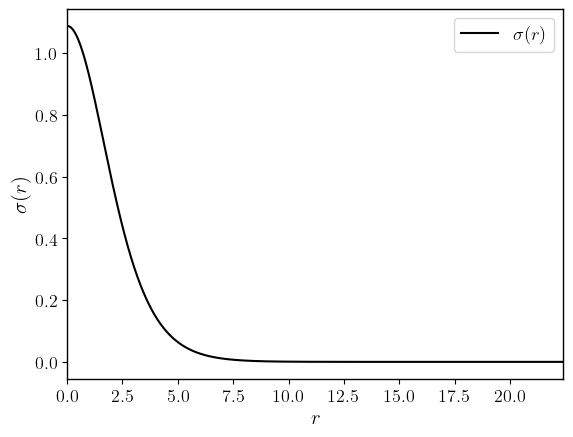

In [49]:
sol = solSys(systema, f0=s0, rmax=rTemp)
plt.plot(sol.t, sol.y[0],label=r'$\sigma(r)$',color='black')
plt.ylabel(r'$\sigma(r)$')
plt.xlabel(r'$r$')
plt.xlim(0, rTemp)
plt.legend(fontsize='small')
plt.show()